# 球樹(Ball Tree)

##### 先引入我們需要的packages

In [5]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices

# MNIST Dataset

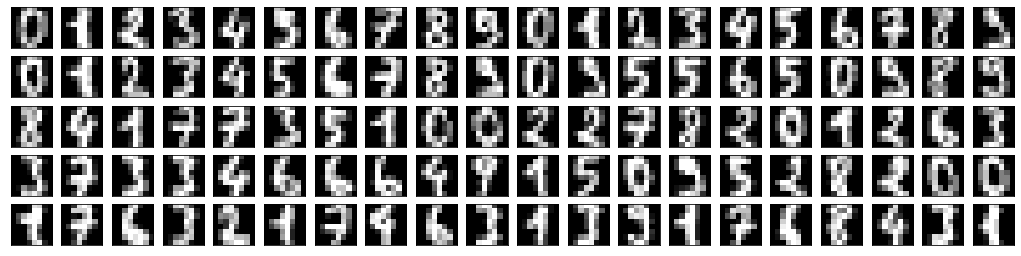

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Ball Tree - Build

In [7]:
def BuildSubtree(root,points,index,leaf_size,depth):
    if(depth==0):
        return
    centroid=np.mean(points[index,:],axis=0)
    farthest_point_1=np.argmax(np.sum((points[index,:]-centroid)**2,axis=1))
    real_index_1=index[farthest_point_1]
    distance_array_1=np.sum((points[index,:]-points[real_index_1,:])**2,axis=1)
    farthest_point_2=np.argmax(np.sum((points[index,:]-points[real_index_1,:])**2,axis=1))
    real_index_2=index[farthest_point_2]
    distance_array_2=np.sum((points[index,:]-points[real_index_2,:])**2,axis=1)
    BOOL=(distance_array_1<=distance_array_2)
    child1_index,child2_index=index[BOOL],index[~BOOL]
    root.index1,root.index2=real_index_1,real_index_2
    if(len(child1_index)<=leaf_size and len(child2_index)<=leaf_size):
        if(depth==1):
            print("tree is not complete")
        root.child1=child1_index
        root.child2=child2_index
    elif(len(child1_index)<=leaf_size):
        root.child1=child1_index
        root.child2=Tree()
        BuildSubtree(root.child2,points,child2_index,leaf_size,depth-1)
    elif(len(child2_index)<=leaf_size):
        root.child2=child2_index
        root.child1=Tree()
        BuildSubtree(root.child1,points,child1_index,leaf_size,depth-1)
    else:
        root.child1=Tree()
        BuildSubtree(root.child1,points,child1_index,leaf_size,depth-1)
        root.child2=Tree()
        BuildSubtree(root.child2,points,child2_index,leaf_size,depth-1)
    return

# Ball Tree - Search

In [8]:
def SearchSubtree(root,points,data):
    if(type(root)==type(np.array(1))):
        return root
    else:
        distance1=np.sum((points[root.index1,:]-data)**2)
        distance2=np.sum((points[root.index2,:]-data)**2)
        if(distance1<=distance2):
            print("child1")
            root=SearchSubtree(root.child1,points,data)
            return root
        else:
            print("child2")
            root=SearchSubtree(root.child2,points,data)
            return root

# Build and Search

In [9]:
class Tree:
    def __init__(self):
        self.child1=None
        self.child2=None
        self.index1=None
        self.index2=None
root=Tree()
N,M=X.shape
Index=np.array(range(0,N))
BuildSubtree(root,X,Index,4,18)
value=SearchSubtree(root,X,X[100,:])
print(value)

child2
child1
child2
child1
child2
child2
child2
child2
child2
child2
child2
child2
child2
[ 24  97 100]
